In [1]:
from matplotlib import pyplot as plt

def plot_results(title, training_results, testing_results):
    colors = ['red', 'blue', 'green', 'black']
    labels = ['relevant/correct', 'irrelevant/correct', 'relevant/incorrect', 'irrelevant/incorrect']
    
    (fig, ax) = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].set_xlabel('Epoch')
    ax[1].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_ylim(0, 1)
    fig.suptitle(title)
    m = training_results['loss_metrics']
    for (mm, color, label) in zip(m, colors, labels):
        ax[0].plot(mm, '--', color=color)
    m = testing_results['loss_metrics']
    for (mm, color, label) in zip(m, colors, labels):
        ax[0].plot(mm, '-', color=color, label=label)
    ax[0].legend()
    m = training_results['acc_metrics']
    for (mm, color, label) in zip(m, colors, labels):
        ax[1].plot(mm, '--', color=color)
    m = testing_results['acc_metrics']
    for (mm, color, label) in zip(m, colors, labels):
        ax[1].plot(mm, '-', color=color, label=label)
    ax[1].legend()
    plt.tight_layout()

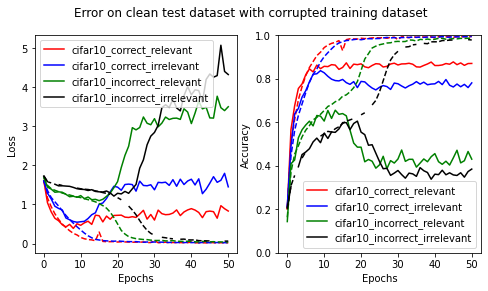

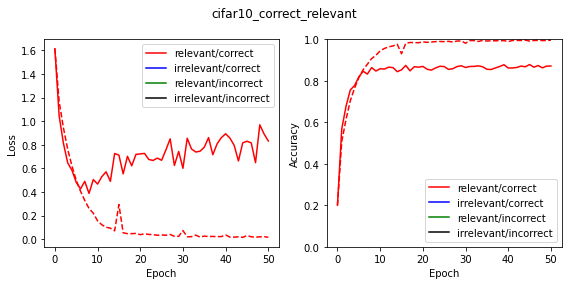

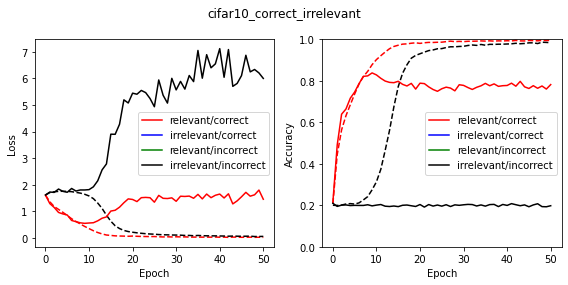

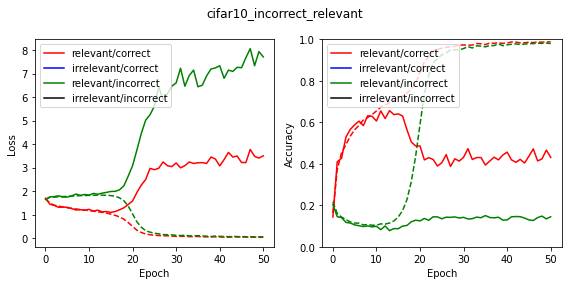

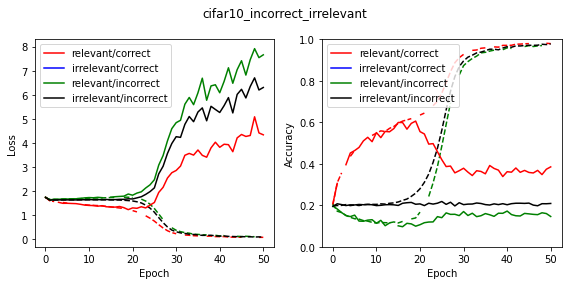

In [2]:
import os
import pickle
from matplotlib import pyplot as plt

colors = ['red', 'blue', 'green', 'black']
(fig, ax) = plt.subplots(1, 2, figsize=(8, 4))
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0, 1)
fig.suptitle('Error on clean test dataset with corrupted training dataset')

directories_to_plot = ['cifar10_correct_relevant',
                       'cifar10_correct_irrelevant', 
                       'cifar10_incorrect_relevant',
                       'cifar10_incorrect_irrelevant']
for (directory, color) in zip(directories_to_plot, colors):
    with open(os.path.join('.', 'results', directory, 'training_results.pickle'), 'rb') as F:
        training_results = pickle.load(F)
    with open(os.path.join('.', 'results', directory, 'testing_results.pickle'), 'rb') as F:
        testing_results = pickle.load(F)
    plot_results(directory, training_results, testing_results)
    training_loss = training_results['loss_metrics'][0]
    testing_loss = testing_results['loss_metrics'][0]
    training_acc = training_results['acc_metrics'][0]
    testing_acc = testing_results['acc_metrics'][0]
    ax[0].plot(training_loss, '--', color=color)
    ax[0].plot(testing_loss, '-', color=color, label=directory)
    ax[1].plot(training_acc, '--', color=color)
    ax[1].plot(testing_acc, '-', color=color, label=directory)
ax[0].legend()
ax[1].legend()
plt.tight_layout()